In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1=pd.read_csv('Comcast_telecom_complaints_data.csv')

In [3]:
df1.head(10)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No
6,361148,Throttling service and unreasonable data caps,24-06-15,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,23-Jun-15,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No
8,318072,Comcast extended outages,06-01-15,06-Jan-15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes


In [4]:
df1.describe(include='all')

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,91,91,2190,2,928,43,NaN,4,2
top,360989,Comcast,24-06-15,24-Jun-15,2:45:12 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


### 1. Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [5]:
df1['Date_month_year'] = pd.to_datetime(df1['Date_month_year'])
df1['Created_Month']=df1['Date_month_year'].apply(lambda x:x.month)
df1['Created_Day']=df1['Date_month_year'].apply(lambda x:x.day)
df1['Created_Day of Week']=df1['Date_month_year'].apply(lambda x:x.dayofweek)

In [6]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
df1['Created_Day of Week']=df1['Created_Day of Week'].map(dmap)

In [7]:
df1

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Created_Month,Created_Day,Created_Day of Week
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Wed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Tue
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Sat
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Sun
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Tue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2,4,Wed
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2,6,Fri
2221,331188,complaint about comcast,06-09-15,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,9,6,Sun
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6,23,Tue


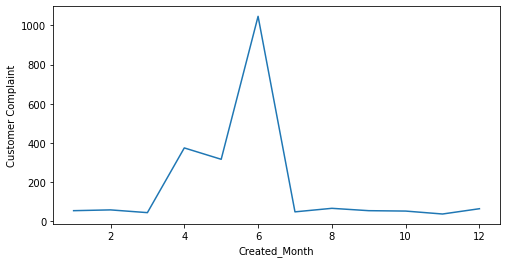

In [8]:
#number of complaints monthly
plt.figure(figsize=(8,4))
bymonth = df1.groupby('Created_Month').count().reset_index()
lp = sns.lineplot(x='Created_Month', y= 'Customer Complaint', data = bymonth, sort=False, markers='0')

 #### INSIGHT: Jun month saw max number of complaints

<Figure size 432x288 with 0 Axes>

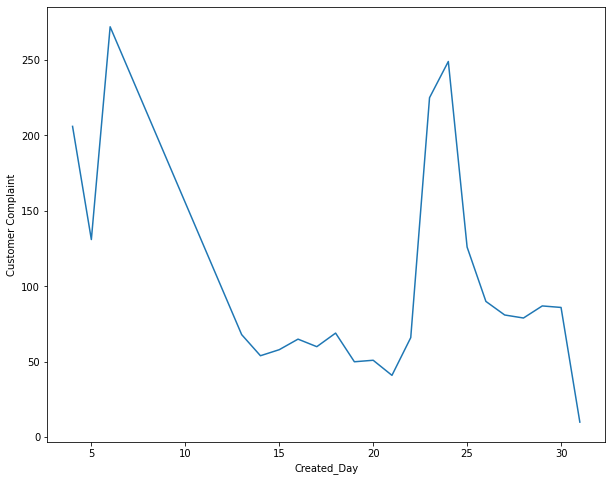

In [10]:
#number of complaints daily
fig = plt.figure()
plt.figure(figsize=(10,8))
bymonth = df1.groupby('Created_Day').count().reset_index()
lp = sns.lineplot(x='Created_Day', y= 'Customer Complaint', data = bymonth, sort=False, markers='0')
fig.savefig('temp1.png', dpi=fig.dpi)

#### INSIGHT: 5-10 and 22-26 dates recorded more number of compliants in a month

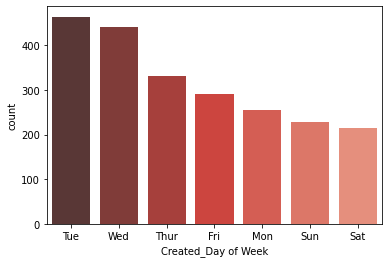

In [11]:
#number of complaints based on created day of the week
fig = plt.figure()
sns.countplot(x='Created_Day of Week', data = df1, order=df1['Created_Day of Week'].value_counts().index, palette ="Reds_d")
fig.savefig('temp2.png', dpi=fig.dpi)

#### INSIGHT: week days registered more complaints than weekend especially Tue, Wed and Thur saw more complaints relative to other days

### 2. Provide a table with the frequency of complaint types.

In [12]:
df1['Received Via'].value_counts()

Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64

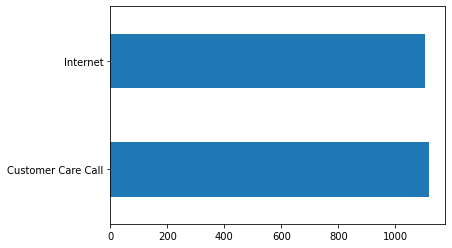

In [15]:
fig = plt.figure()
df1['Received Via'].value_counts().plot(kind='barh')#.bar()
fig.savefig('temp3.png', dpi=fig.dpi)

### 3. Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [16]:
df1['Highlevel_Status'] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df1["Status"]]

In [17]:
df1['Highlevel_Status'].unique()

array(['Closed', 'Open'], dtype=object)

### 4. Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.

In [18]:
df1['State'] = df1['State'].str.title() 
st_cmp = df1.groupby(['State','Highlevel_Status']).size().unstack().fillna(0)

In [19]:
st_cmp

Highlevel_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,15.0,2.0
Florida,201.0,39.0


<Figure size 432x288 with 0 Axes>

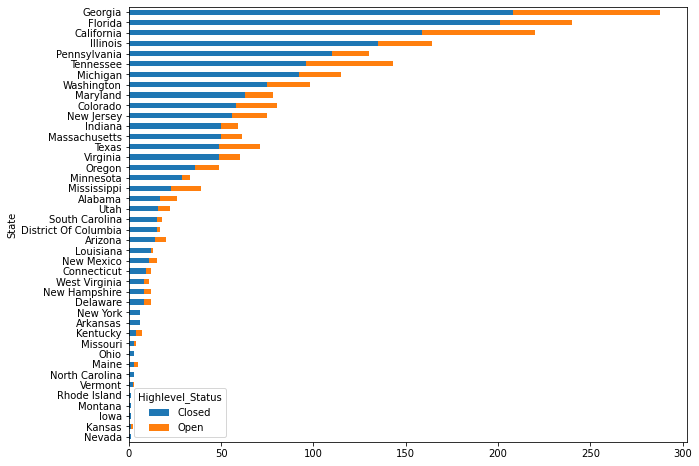

In [23]:
fig = plt.figure()
st_cmp.sort_values('Closed',axis = 0,ascending=True).plot(kind="barh", figsize=(10,8), stacked=True)
fig.savefig('temp4.png', dpi=fig.dpi)

### 5. Which state has the maximum complaints

In [24]:
st_cmp.sort_values('Closed',axis = 0,ascending=False)[:1]

Highlevel_Status,Closed,Open
State,,
Georgia,208.0,80.0


In [25]:
df1.groupby(["State"]).size().sort_values(ascending=False).to_frame().rename({0: "Complaint count"}, axis=1)[:1]

,Complaint count
State,
Georgia,288


#### INSIGHT: State Georgia has the maximum complaints

In [26]:
CT = df1.groupby(["State","Highlevel_Status"]).size().unstack().fillna(0)
CT.sort_values('Closed',axis = 0,ascending=False)[:1]

Highlevel_Status,Closed,Open
State,,
Georgia,208.0,80.0


### 6. Which state has the highest percentage of unresolved complaints

In [27]:
#highest percentage of unresolved complaints
CT['Resolved_cmp_prct'] = CT['Closed']/CT['Closed'].sum()*100
CT['Unresolved_cmp_prct'] = CT['Open']/CT['Open'].sum()*100

In [28]:
CT.sort_values('Unresolved_cmp_prct',axis = 0,ascending=False)

Highlevel_Status,Closed,Open,Resolved_cmp_prct,Unresolved_cmp_prct
State,,,,
Georgia,208.0,80.0,12.185120,15.473888
California,159.0,61.0,9.314587,11.798839
Tennessee,96.0,47.0,5.623902,9.090909
Florida,201.0,39.0,11.775044,7.543520
Illinois,135.0,29.0,7.908612,5.609284
Washington,75.0,23.0,4.393673,4.448743
Michigan,92.0,23.0,5.389572,4.448743
Colorado,58.0,22.0,3.397774,4.255319
Texas,49.0,22.0,2.870533,4.255319


In [29]:
CT.sort_values('Unresolved_cmp_prct',axis = 0,ascending=False)[:1]

Highlevel_Status,Closed,Open,Resolved_cmp_prct,Unresolved_cmp_prct
State,,,,
Georgia,208.0,80.0,12.18512,15.473888


#### INSIGHT: Georgia state has highest Unresolved complaints when compared to other states 

### 7. Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [30]:
Com_res = df1.groupby(['Received Via','Highlevel_Status']).size().unstack().fillna(0)

In [31]:
Com_res

Highlevel_Status,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [32]:
Com_res['resolved'] =Com_res['Closed']/Com_res['Closed'].sum()*100
Com_res['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64

#### INSIGHT: 50.615114% of Customer Care Call complaints were resolved till date, 49.384886% of Internet complaints were resolved till date